In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
!ls prediction

gpt-4o-mini_result.csv


In [3]:
df = pd.read_csv('prediction/gpt-4o-mini_result.csv')
print(df.shape)
df.tail()

(30, 2)


,image_id,"Extract the type of the image, categorizing it as 'email', 'resume' or 'scientific_publication'. Type:"
25,doc_000097.png,The type of the image is categorized as 'scien...
26,doc_000281.png,The type of the image is categorized as 'resume'.
27,doc_000509.png,The type of the image is: **scientific_publica...
28,doc_000596.png,The type of the image is 'email'.
29,doc_000864.png,The type of the image is 'scientific_publicati...


In [5]:
df["Extract the type of the image, categorizing it as 'email', 'resume' or 'scientific_publication'. Type:"].value_counts()

The type of the image is 'email'.                                    4
The type of the image is categorized as 'resume'.                    3
Type: email                                                          3
The type of the image is: **scientific_publication**.                3
The type of the image is categorized as 'scientific_publication'.    3
Type: scientific_publication                                         2
type: email                                                          1
The type of the image can be categorized as 'resume'.                1
The type of the image is classified as 'resume'.                     1
scientific_publication                                               1
The type of the image is 'resume'.                                   1
The type of the image is categorized as **email**.                   1
The image type is categorized as a **resume**.                       1
The type of the image is categorized as a 'resume'.                  1
The im

In [9]:
search_strings = ['email', 'resume', 'scientific_publication']

results = []

for original_string in df["Extract the type of the image, categorizing it as 'email', 'resume' or 'scientific_publication'. Type:"]:
    # search_stringsにマッチした、その文字列を返す
    result = next((s for s in search_strings if s in original_string), None)
    results.append(result)

results

['scientific_publication',
 'scientific_publication',
 'email',
 'scientific_publication',
 'email',
 'scientific_publication',
 'scientific_publication',
 'scientific_publication',
 'email',
 'resume',
 'resume',
 'resume',
 'email',
 'resume',
 'email',
 'email',
 'resume',
 'resume',
 'email',
 'resume',
 'scientific_publication',
 'email',
 'email',
 'scientific_publication',
 'scientific_publication',
 'scientific_publication',
 'resume',
 'scientific_publication',
 'email',
 'scientific_publication']

In [10]:
df['vm_result'] = results

In [12]:
df['vm_result'].value_counts()

scientific_publication    12
email                     10
resume                     8
Name: vm_result, dtype: int64

In [13]:
df_label = pd.read_csv('../tmp/DAI_document_classification_TEST/data.csv')
df_label.head()

,image,class
0,images/doc_000832.png,scientific_publication
1,images/doc_000076.png,email
2,images/doc_000584.png,scientific_publication
3,images/doc_000101.png,resume
4,images/doc_000279.png,email


In [18]:
df['image'] = 'images/'+df['image_id']

df = pd.merge(df, df_label, on=['image'])
df.head()

,image_id,"Extract the type of the image, categorizing it as 'email', 'resume' or 'scientific_publication'. Type:",vm_result,image,class
0,doc_000016.png,Type: scientific_publication,scientific_publication,images/doc_000016.png,scientific_publication
1,doc_000101.png,Type: scientific_publication,scientific_publication,images/doc_000101.png,resume
2,doc_000297.png,Type: email,email,images/doc_000297.png,email
3,doc_000513.png,The type of the image is: **scientific_publica...,scientific_publication,images/doc_000513.png,scientific_publication
4,doc_000655.png,The type of the image is 'email'.,email,images/doc_000655.png,email


In [22]:
df.to_csv('prediction/gpt-4o-mini_result_final.csv', index=False)

In [23]:
labels = sorted(set(df['class']))
cm = confusion_matrix(df['class'].to_list(), df['vm_result'].to_list(), labels=labels)
cm

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]])

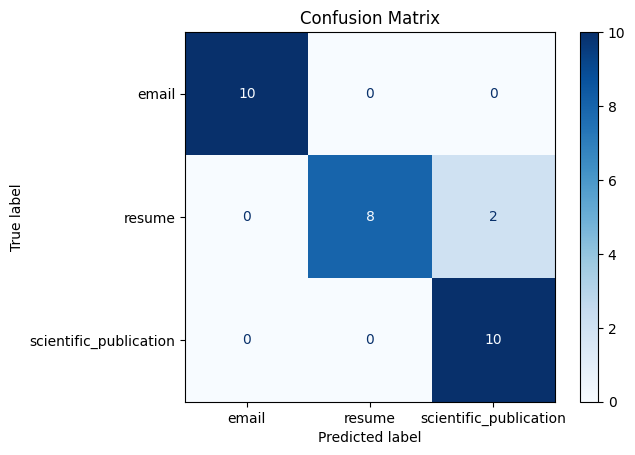

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)  # 色設定（オプション）
plt.title("Confusion Matrix")
plt.show()